In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
with open('log.txt', 'r') as fp:
    content = fp.read()

In [51]:
lines = content.split('\n')
lines = lines[:-1]

In [52]:
train_accs = []
valid_accs = []
train_ppl  = []
valid_ppl  = []
train_xent = []

In [53]:
for line in lines:
    info = line[31:]
    info = info.split()
    if info[0] == 'Step':
        for i in range(1,len(info)):
            if info[i-1] == 'acc:':
                train_accs.append(float(info[i][:-1]))
            elif info[i-1] == 'ppl:':
                train_ppl.append(float(info[i][:-1]))
            elif info[i-1] == 'xent:':
                train_xent.append(float(info[i][:-1]))
    elif info[0] == 'Validation':
        if info[1] == 'perplexity:':
            valid_ppl.append(float(info[2]))
        elif info[1] == 'accuracy:':
            valid_accs.append(float(info[2]))

In [54]:
train_accs = train_accs[:int(len(train_accs)/2)]
train_ppl  = train_ppl[:int(len(train_ppl)/2)]
train_xent = train_xent[:int(len(train_xent)/2)]
valid_accs = valid_accs[:int(len(valid_accs)/2)]
valid_ppl  = valid_ppl[:int(len(valid_ppl)/2)]

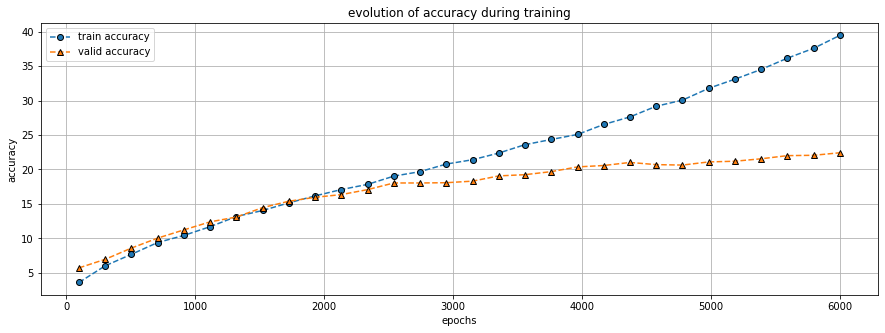

In [61]:
plt.figure(figsize=(15, 5))
x = np.linspace(100, 6000, len(train_accs))
plt.plot(x, train_accs, label='train accuracy', marker = 'o', linestyle='--', markeredgecolor='black')
x = np.linspace(100, 6000, len(valid_accs))
plt.plot(x, valid_accs, label='valid accuracy', marker = '^', linestyle='--', markeredgecolor='black')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('evolution of accuracy during training')
plt.legend()

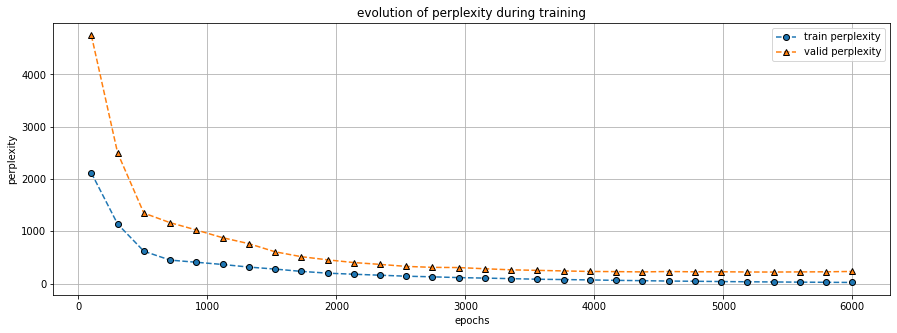

In [63]:
plt.figure(figsize=(15, 5))
x = np.linspace(100, 6000, len(train_ppl))
plt.plot(x, train_ppl, label='train perplexity', marker = 'o', linestyle='--', markeredgecolor='black')
x = np.linspace(100, 6000, len(valid_ppl))
plt.plot(x, valid_ppl, label='valid perplexity', marker = '^', linestyle='--', markeredgecolor='black')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('perplexity')
plt.title('evolution of perplexity during training')
plt.legend()

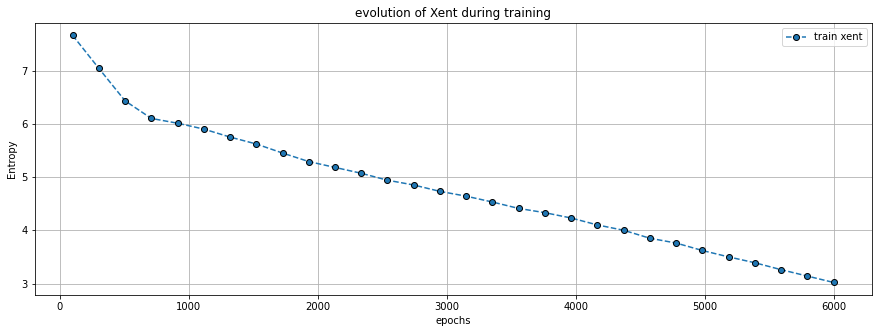

In [64]:
plt.figure(figsize=(15, 5))
x = np.linspace(100, 6000, len(train_xent))
plt.plot(x, train_xent, label='train xent', marker = 'o', linestyle='--', markeredgecolor='black')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('Entropy')
plt.title('evolution of Xent during training')
plt.legend()